<a href="https://colab.research.google.com/github/Anika-Saxena/Titanic_survivors/blob/main/Titanic_survivors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from pandas import DataFrame, Series

In [3]:
titanic_df=pd.read_csv('/content/drive/MyDrive/datasets/titanic_train.csv')

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Visualisation

---
**Questions for Analysing the Dataset:**

1. Who were the passengers on Titanic? (Age, Gender, Class)
2. What deck were the passengers on and how does that relate to their class?
3. Where did the passengers come from?
4. Who was alone and who was with family?
5. What factors helped someone survive the sinking?

---


# Q1: Who were the passengers? (Age, Gender, Class)
---

In [6]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

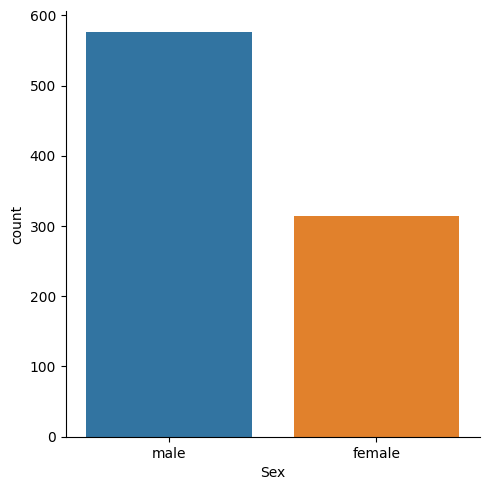

In [7]:
sns.catplot(x='Sex',data=titanic_df, kind="count")

*From the plot obtained, it can be analysed that the number of male passengers was almost twice than that of the female passengers onboard on Titanic.*

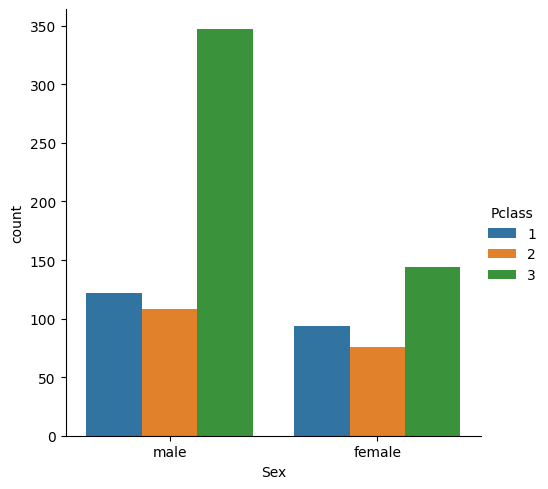

In [8]:
sns.catplot(x='Sex',hue='Pclass',data=titanic_df, kind="count")

*On analysing the class type distribution of the passengers for each gender, it can be seen that male passengers travelling in class 3 were in majority on board.*

*It can be concluded that it might be useful to look into the gender-wise distribution of each passenger class instead of our previous approach to obtain more meaningful results.*

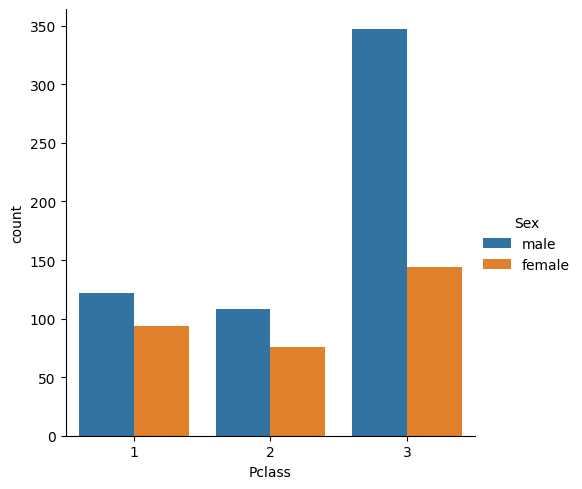

In [9]:
sns.catplot(x='Pclass',hue='Sex',data=titanic_df, kind="count")

*Majority of people travelling in passenger class 3 are found to be male but upon analysing the gender-wise distribution of passenger classes 1 and 2, it can be conluded that the gender-wise distribution of these classes is more or less even relatively than class 3.*

In [10]:
def male_female_child(passenger):
  age, sex = passenger
  if age<16:
    return "child"
  else:
    return sex

*Keeping in mind the phrase that in times of disaster, women and children must be rescued first, it might be useful to analyse the distribution of men, women and children on board. To do that, we create a function to take in a passenger object and classify them as male, female or child. We keep the boundary condition that if a passenger is less than the age of 16, they are classified as a child.*

*We create a function male_female_child() to be applied on dataset to classify the passengers as required.*

In [11]:
titanic_df['person']=titanic_df[['Age','Sex']].apply(male_female_child, axis=1)
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


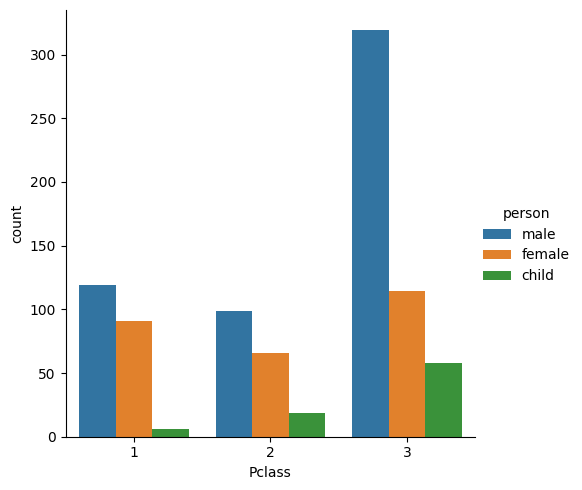

In [12]:
sns.catplot(x='Pclass',data=titanic_df, hue='person', kind='count')

*More number of children were found in passenger class 3 upon analysing the data.*

<Axes: >

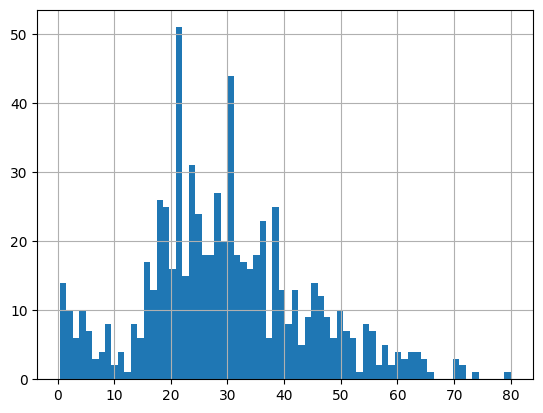

In [13]:
titanic_df['Age'].hist(bins=70)

*Upon analysing the distribution of ages, a peaks descend at young children aged around 10 years and then we can observe a more normal distribution. It can be estimated that the mean would lie somewhere around the age of 30.*

In [14]:
print('Mean of ages of passenger is =',titanic_df['Age'].mean())

Mean of ages of passenger is = 29.69911764705882


*The mean of the ages of the passengers is found to be about 29.7 years which coincides with our estimation upon analyisng the histogram obtained.*

In [15]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


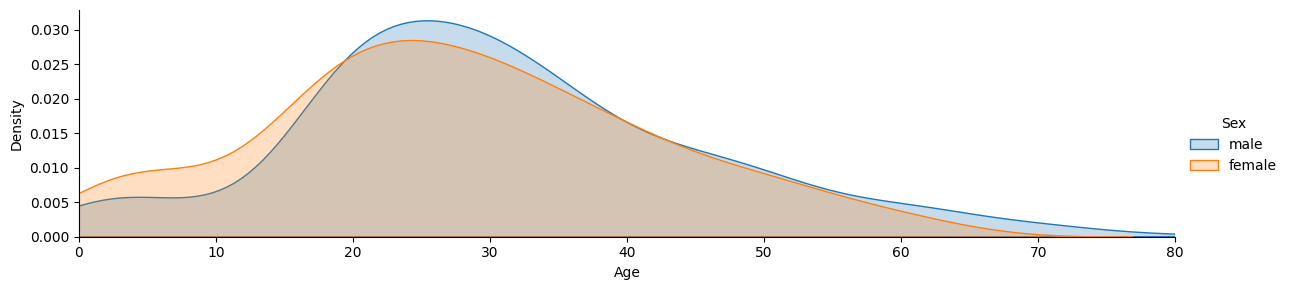

In [16]:
fig=sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=titanic_df['Age'].max() #oldest passenger
fig.set(xlim=(0,oldest))
fig.add_legend()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


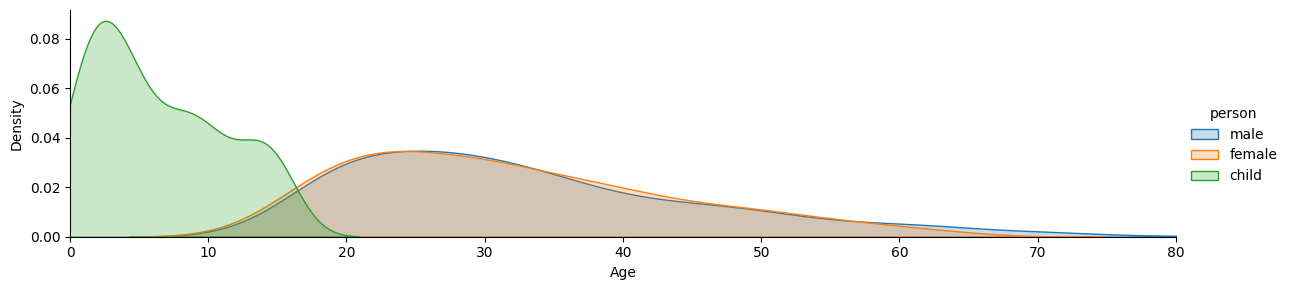

In [17]:
fig=sns.FacetGrid(titanic_df,hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
fig.set(xlim=(0,oldest))
fig.add_legend()

*The KDE plot of children exceed the 16 age mark due to the bandwidth.*

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


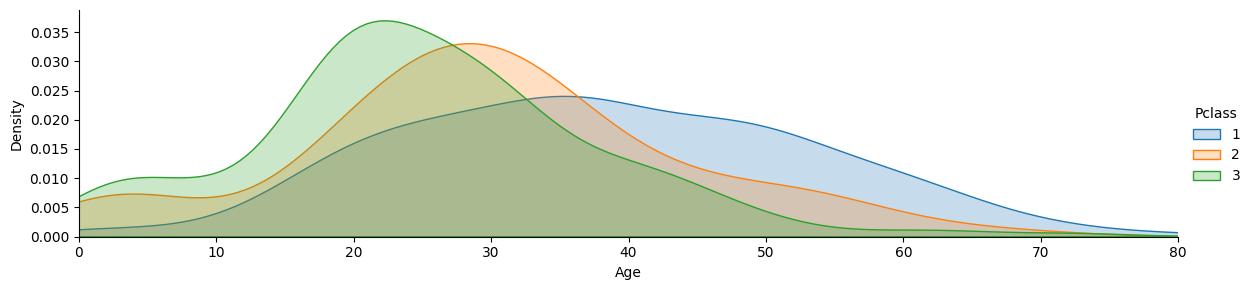

In [18]:
fig=sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
fig.set(xlim=(0,oldest))
fig.add_legend()

*Upon analysing how the ages range with the passenger class, it can be observed that the plot of passengers in first class has a very normal distribution whereas the distribution of passenger classes two and three is much more skewed towards the 20-30 age range.*

# Q2: What deck were the passengers on and how does that relate to their class?

In [19]:
deck = titanic_df['Cabin'].dropna() #dropping null values
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

*The deck of each passenger is indicated by the first letter of their cabin, hence we shall create a simple for loop to extract the first letter of each passenger's cabins to find out their deck.*

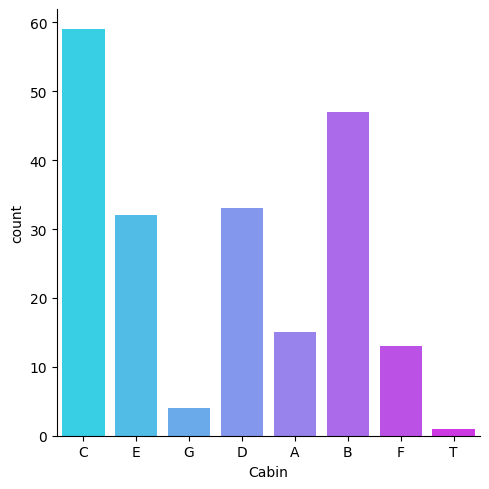

In [20]:
levels=[]
for level in deck:
  levels.append(level[0])
cabin_df=DataFrame(levels)
cabin_df.columns=['Cabin']
sns.catplot(x='Cabin',data=cabin_df, kind='count', palette='cool')

*The values of T cabin is not useful for our dataset as we are interested in analysing the cabin decks from A through G so, to simplify our dataset we would drop the T-cabin values.*

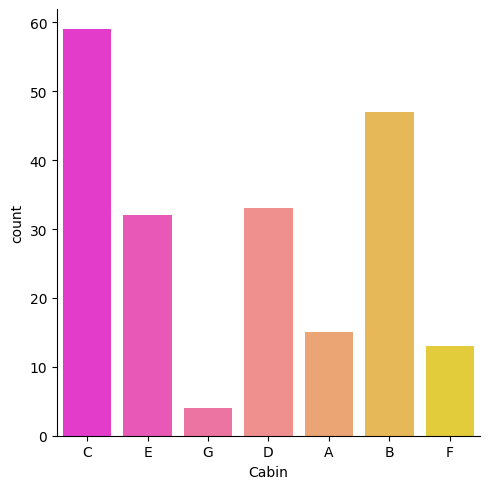

In [21]:
cabin_df = cabin_df[cabin_df.Cabin !='T']
sns.catplot(x='Cabin',data=cabin_df, kind='count', palette='spring')

# Q3: Where did the passengers come from?

*The 'Embarked' column of the dataset indicates the port of embarkation of the passenger and the data in this column is strings C, Q and S which stand for town/cities. (C-Cherbourg, Q-Queenstown & S-Southampton)*

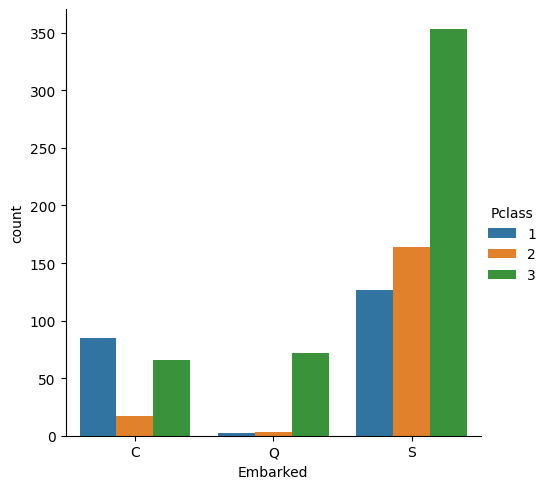

In [22]:
sns.catplot(x='Embarked', data=titanic_df, kind="count", hue="Pclass", order=['C','Q','S'])

*It is observed that the passengers from Queenstown were majorly belonging to third class. Whereas the passengers from Cherbourg were majorly travelling by first class. These observations are useful to analyse the economic conditions of these towns and cities during that time period.*

# Q4: Who was alone and who was with family?

*To analyse which passengers were travelling alone and who were travelling with family, our columns of interest are: 'SibSp' and 'Parch' which stand for sibling present onboards and if the passenger's parent or child was present on board respectively.*

*It is a viable stratergy to define a new column in the datset that can be prepared on the basis of these columns to showcase which passengers were travelling alone and which passengers were travelling with family.*

In [23]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

*By adding the columns representing the number of sibling and the number of parents/child of each passenger present on board for the 'Alone' column, the values of the newly created column can be interpretted as that any value more than zero represents that the passenger had a family member on board and in the event of the value being 0, it can be interpretted that the passenger was travelling alone with no family onboard.*

In [24]:
titanic_df['Alone'].loc[titanic_df['Alone']>0]= 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone']==0]= 'Alone'
titanic_df.head()

<ipython-input-24-59c48126dce6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['Alone'].loc[titanic_df['Alone']>0]= 'With Family'


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


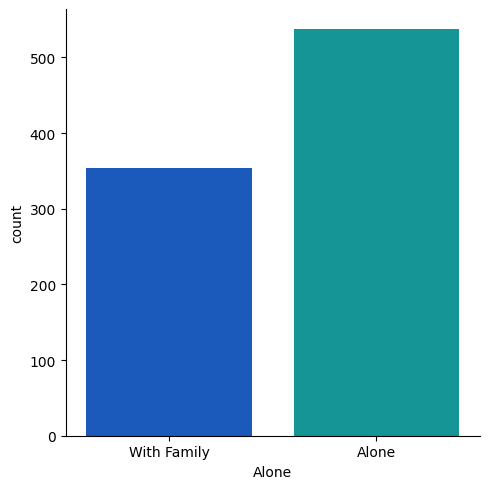

In [25]:
sns.catplot(x='Alone',data=titanic_df, kind='count',palette='winter')

*Upon analysing the plot generate, we can conclude that people travelling alone were more than the passengers that had some sort of family either siblings or parents or children on board.*

# Q5: What factors helped someone survive the sinking?

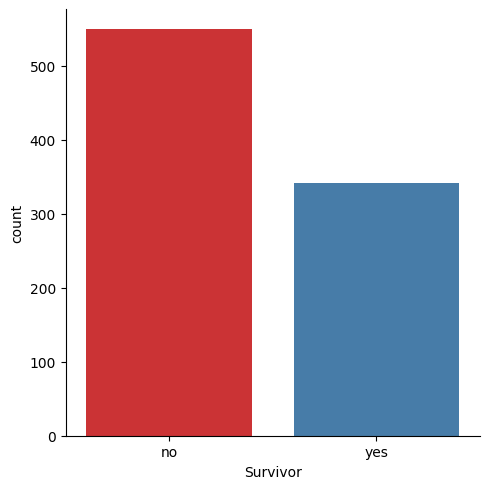

In [26]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})
sns.catplot(x='Survivor', data=titanic_df, kind='count', palette='Set1')

*Upon plotting the passenger's dsitribution over the survival it is found that there were significantly more number of passengers on board that didn't survive than those who survived.*

*Now we shall analyse whether the trend of people in different passenger classes impacted their survival rate.*

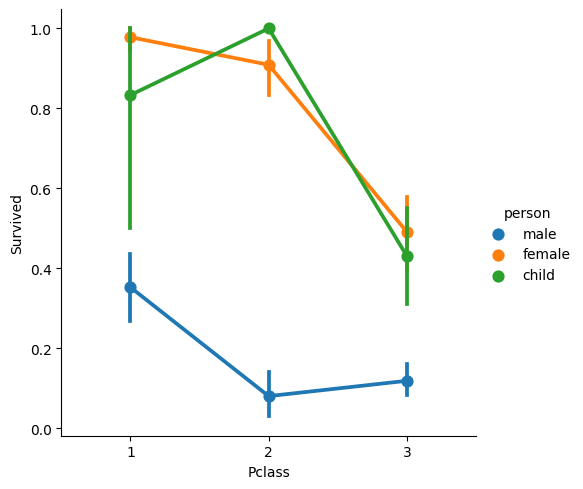

In [27]:
sns.catplot(x='Pclass',y='Survived',hue='person', data=titanic_df,kind='point')

*It can be observed that the general survival trend for the passengers travelling in third class is substantially lower than classes 1 and 2.*

*Also, it can be concluded that if passenger is male and belongs to the third class, his chances of survival are not favourable.*

*Also, regardless of the class, it can be concluded that the result of being a male in any of the classes dramaticaaly decreases the chances of survival of the passenger.*

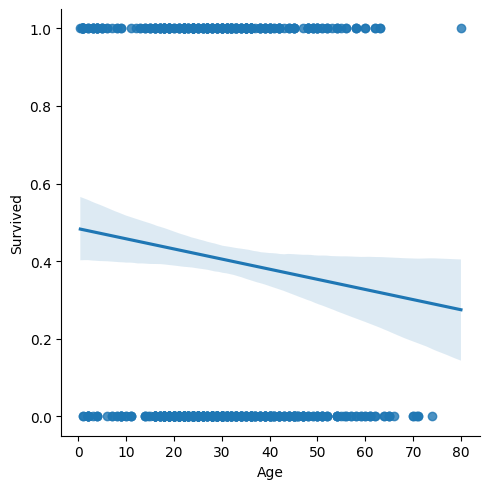

In [28]:
sns.lmplot(x='Age',y='Survived',data=titanic_df)

*A general trend upon observing the linear line on the plot can be found that the older the passenger was the less likely it was that they survived.*

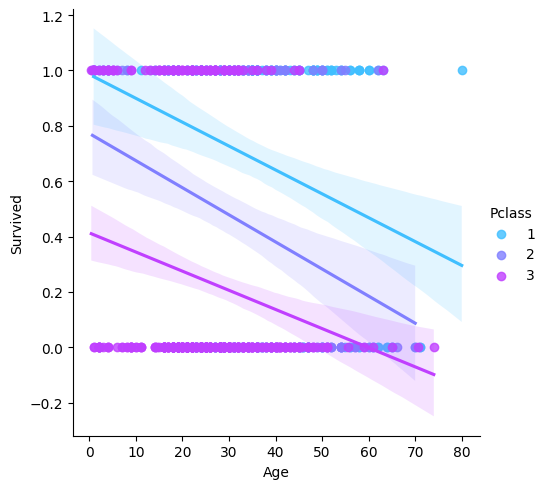

In [29]:
sns.lmplot(x='Age',y='Survived',hue='Pclass',data=titanic_df,palette='cool')

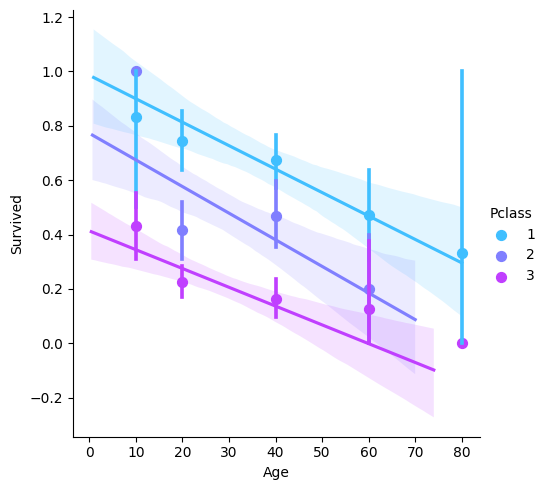

In [30]:
generation=[10,20,40,60,80]
sns.lmplot(x='Age',y='Survived',hue='Pclass',data=titanic_df,palette='cool', x_bins=generation)

*Upon cleaning the visual plot by adding bins for different generation age, a strandard deviation found on the older people in first class is a useful find.*

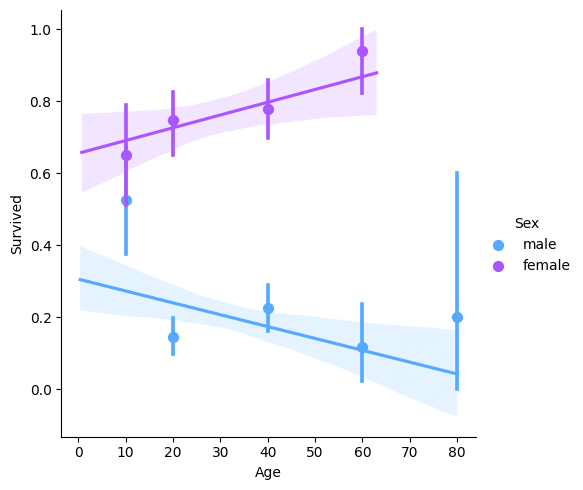

In [31]:
sns.lmplot(x='Age',y='Survived',hue='Sex',data=titanic_df,palette='cool', x_bins=generation)

*It can be analysed that older female passengers had a better trend of surviving as compared to their older male counterparts.*

*Now we shall analyse the impact of being on a higher deck like A or on a lower deck like F on the survival rate of the passenger and how does the passenger being a male affect that outcome.*

<ipython-input-32-2b7d534a8424>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deck_df['Cabin_new']=levels


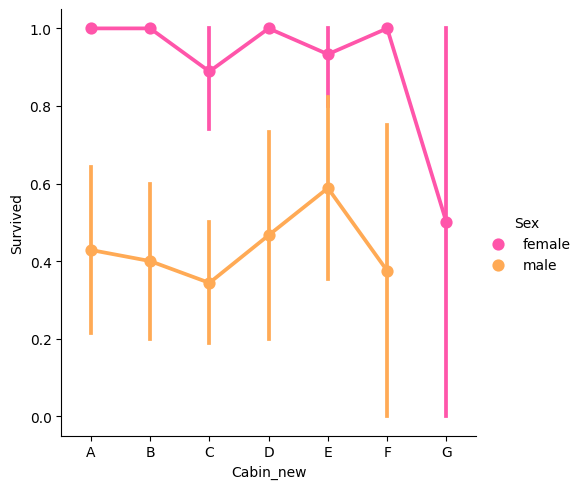

In [32]:
deck_df=titanic_df.dropna(subset=['Cabin'])
deck_df['Cabin_new']=levels
sns.catplot(x='Cabin_new',y='Survived',hue='Sex',data=deck_df,palette='spring',kind='point',order=['A','B','C','D','E','F','G'])

*Upon analysing the visual plot of the data with rescept to their deck and genders, it was found that all women on higher decks A,B and D survived, leading us to conclude that women in higher decks like A,B,C,D had a better chance at survivng than those women at lower decks. Also, the men had a lower chance of survival in comparision to women even on the higher decks. At the lowest deck G, it was found that no male passenger survived which can be interpretted as males on lower decks had the least chances of surviving as compared to the other passengers on Titanic.*

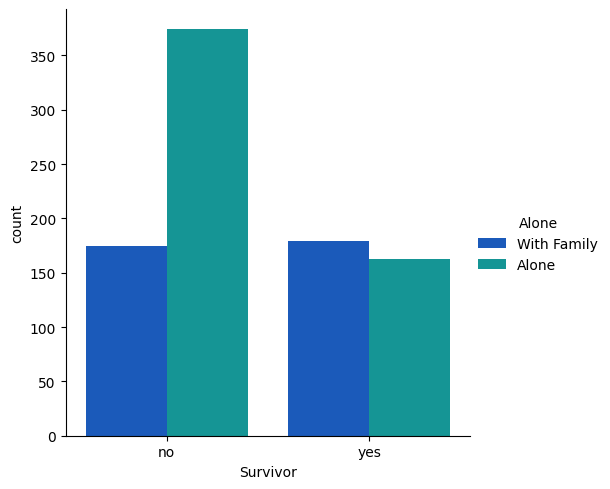

In [33]:
sns.catplot(x='Survivor',hue='Alone',data=titanic_df,palette='winter',kind='count')

*Upon analysing the visualisation, it can be interpretted that passengers that didn't have family on board had substantially more lower rate of survival than other passengers.Whereas the passengers that survived had an almost equivalent distribution of passengers with family and those who were travelling alone.*

# **Data Analysis and Creating a Model**

# Analysing correlation of each Feature: 

In [34]:
train_df=pd.read_csv('/content/drive/MyDrive/datasets/titanic_train.csv')
test_df=pd.read_csv('/content/drive/MyDrive/datasets/titanic_test.csv')

In [35]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [37]:
print(f"Dimensions of Train dataset is: {train_df.shape}")
print(f"Dimensions of Test dataset is: {test_df.shape}")

Dimensions of Train dataset is: (891, 12)
Dimensions of Test dataset is: (418, 11)


*Test dataset has 11 feature columns excluding the target column present in the train dataset (survived). The number of rows representing the number of passenger details we have are 891 and 418 in the train and test datasets respectively.*

In [38]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

*In the train dataset, it can be observed that there are some missing values in Age, Cabin and Embarked columns/features whereas some entries in Age, Fare and Cabin columns are present in the test dataset.*

In [39]:
train_df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


*Upon analysing the gender and their respective survival rates, it can be concluded that the survival rate of females is considerably higher than that of males and hence there is a strong correlation between the 'Survived' and 'Sex' columns.*

In [40]:
train_df[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


*According to the survival ratio obtained in the above table, it can be inferred that passengers who embarked from Cherbourg had a higher surviving ratio.*

In [41]:
train_df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


*It can be analysed that passengers belonging to class 1 had considerably higher survival rates than those who were in class 3. Hence, the class of passengers also exhibits a great correlation with the chance of survival of passengers as per the data.*

In [42]:
train_df[['Fare','Survived']].groupby(['Survived'],as_index=False).mean()

,Survived,Fare
0,0,22.117887
1,1,48.395408


*The average fare value of the passsengers who survived is much higher (more than twice) than that of those who did not survive. This result was expected as we can guess a correlation between the Fare and Pclass of the passengers affecting their chance of survival.*

In [43]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
print("<10: ",train_df[train_df['Age']<10]['Survived'].mean())
print("(15-25): ",train_df[train_df['Age'].between(15,25,inclusive=False)]['Survived'].mean())
print("(25-35): ",train_df[train_df['Age'].between(25,35,inclusive=False)]['Survived'].mean())
print(">35: ",train_df[train_df['Age']>35]['Survived'].mean())

<10:  0.6129032258064516
(15-25):  0.35384615384615387
(25-35):  0.4044943820224719
>35:  0.3824884792626728


*Passengers under the age 10 had very high survival rates whereas the younger passengers (aged 15-25) had lower survival rates than the middle aged passengers (aged 25-35).*

In [45]:
train_df[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


*It can be inferred that travelling alone does not increase the odds of survival as one might have expected.*

<Axes: >

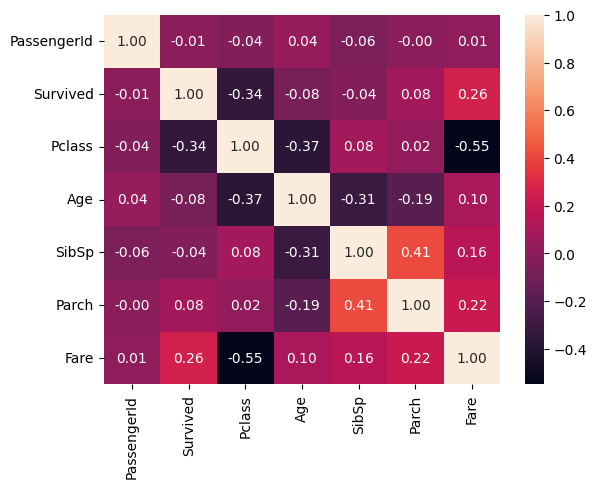

In [46]:
sns.heatmap(train_df.corr(),annot=True, fmt=".2f")

*It can be inferred that amongst the numerical features, Pclass and Fare show the highest correlation with the target Survived. However, they may not be percieved as two distinct features as they are inter-related. However, the heatmap cannot interpret the correlation of the feature 'Sex' as it is not Numeric.*

# Feature Engineering & Modelling

*First, we shall select the numeric type features to create our machine learning model:*

In [47]:
X=train_df[["Pclass",'Age','SibSp','Parch','Fare']]
Y=train_df['Survived']

*Before building and fitting our model, we need to complete the missing values from the datasets before deploying the model.*

In [48]:
train_df['Age'].fillna(train_df['Age'].mean(),inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(),inplace=True)
train_df['Fare'].fillna(train_df['Fare'].mean(),inplace=True)
test_df['Fare'].fillna(test_df['Fare'].mean(),inplace=True)
X=train_df[["Pclass",'Age','SibSp','Parch','Fare']]
Y=train_df['Survived']

*Next, we shall split our data into train and test type so that we are able to check the model's accuracy later as it is not possible to overfit the model by using only one set of data. We shall first use random forest classifier model for this dataset as it is nonlinear in nature because it involves the combination of multiple decision trees to create a more complex model that can capture nonlinear relationships between features and target variables.*

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)
rfc=RandomForestClassifier(random_state=35)
rfc.fit(X_train, Y_train)
print('Test Accuracy: ',rfc.score(X_test,Y_test))

Test Accuracy:  0.6604477611940298


*Using only numeric data rendered us 66% accuracy hence we shall now resort to involve features with object datatype such as Sex and Embarked. To do this, we shall be label encoding to convert each string value to a corresponding numeric value. Label encoding replaces each unique string value with a unique number. Also, we do need to remove the NULL values when we perform label encoding as it encodes all NULL values as -1 by default.*

In [50]:
train_df['Sex_encoded']=pd.factorize(train_df['Sex'])[0]
train_df['Embarked_encoded']=pd.factorize(train_df['Embarked'])[0]
test_df['Sex_encoded']=pd.factorize(test_df['Sex'])[0]
test_df['Embarked_encoded']=pd.factorize(test_df['Embarked'])[0]

*Now we shall deploy our model again using the newly encoded values:*

In [51]:
X=train_df[["Pclass",'Age','SibSp','Parch','Fare','Sex_encoded','Embarked_encoded']]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)
rfc=RandomForestClassifier(random_state=35)
rfc.fit(X_train, Y_train)
print('Test Accuracy: ',rfc.score(X_test,Y_test))

Test Accuracy:  0.7910447761194029


*The test accuracy has increased from 66% to 79% but we can make our model more accurate by involing the cabin feature as well. But we cannot perform label encoding directly on the cabin column as it has many distinct values.*

In [52]:
train_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

*Hence we need to acquire the deck codes represented by the first character of the string values of the cabin column which can be performed by slicing the strings.*

In [53]:
train_df['Cabin'].fillna("N",inplace=True)
train_df['Deck']=train_df['Cabin'].str.slice(0,1)
test_df['Cabin'].fillna("N",inplace=True)
test_df['Deck']=train_df['Cabin'].str.slice(0,1)
train_df['Cabin_encoded']=pd.factorize(train_df['Deck'])[0]
test_df['Cabin_encoded']=pd.factorize(test_df['Deck'])[0]

In [54]:
X=train_df[["Pclass",'Age','SibSp','Parch','Fare','Sex_encoded','Embarked_encoded','Cabin_encoded']]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)
rfc=RandomForestClassifier(random_state=35)
rfc.fit(X_train, Y_train)
print('Test Accuracy: ',rfc.score(X_test,Y_test))

Test Accuracy:  0.7910447761194029


*Adding the cabin feature to the dataset did not help increase the accuracy. Since, Random forest is a tree-based model, feature scaling would not change the accuracy.*

In [64]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_sc=scaler.fit_transform(X_train)
X_test_sc=scaler.fit_transform(X_test)
rfc=RandomForestClassifier(random_state=35)
rfc.fit(X_train_sc, Y_train)
print('Train Accuracy: ',round(rfc.score(X_train_sc,Y_train)*100,2),"%")
print('Test Accuracy: ',round(rfc.score(X_test_sc,Y_test)*100,2),"%")

Train Accuracy:  91.97 %
Test Accuracy:  79.48 %


*We can observe that standardisation of features does not improve the accuracy of our model. Since, a difference between the train and test accuracy of our model can be observed, this may be considered a case of overfitting which means that the model has learned the training data too well and has become too specialized to that data, which can lead to poor performance on new data. Hence, we may try to find the column that is leading to the overfitting of our model.*

In [56]:
rfc=RandomForestClassifier(random_state=35)
for x in X_train.columns:
  rfc.fit(X_train[[x]],Y_train)
  print("Train Accuracy for ",x," =",rfc.score(X_train[[x]],Y_train)*100,"%")
  print("Test Accuracy for ",x," =",rfc.score(X_test[[x]],Y_test)*100,"%\n\n")

Train Accuracy for  Pclass  = 67.25521669341894 %
Test Accuracy for  Pclass  = 69.40298507462687 %


Train Accuracy for  Age  = 70.46548956661316 %
Test Accuracy for  Age  = 54.1044776119403 %


Train Accuracy for  SibSp  = 62.92134831460674 %
Test Accuracy for  SibSp  = 58.582089552238806 %


Train Accuracy for  Parch  = 64.84751203852326 %
Test Accuracy for  Parch  = 58.95522388059702 %


Train Accuracy for  Fare  = 80.73836276083468 %
Test Accuracy for  Fare  = 70.1492537313433 %


Train Accuracy for  Sex_encoded  = 78.49117174959872 %
Test Accuracy for  Sex_encoded  = 79.1044776119403 %


Train Accuracy for  Embarked_encoded  = 65.32905296950241 %
Test Accuracy for  Embarked_encoded  = 60.447761194029844 %


Train Accuracy for  Cabin_encoded  = 70.14446227929373 %
Test Accuracy for  Cabin_encoded  = 67.91044776119402 %




*Highest test accuracy is observed for Sex column with 79% accuracy for test data rendering it as the most important feature of our model. Moreover, the accuracy of its train and test data is also similar making it an ideal situation to focus on this feature. The difference between train and test accuracies is found to be significantly high (6-10%) for numeric features such as age and fare. If we encode such numeric data into categories, it may increase the accuracy of our model.*

In [57]:
train_df.loc[train_df['Age']<=7.5, 'Age_encoded']=0
train_df.loc[(train_df['Age']>7.5) & (train_df['Age']<=15), 'Age_encoded']=1
train_df.loc[(train_df['Age']>15) & (train_df['Age']<=25), 'Age_encoded']=2
train_df.loc[(train_df['Age']>25) & (train_df['Age']<=30), 'Age_encoded']=3
train_df.loc[(train_df['Age']>30) & (train_df['Age']<=35), 'Age_encoded']=4
train_df.loc[(train_df['Age']>35) & (train_df['Age']<=50), 'Age_encoded']=5
train_df.loc[train_df['Age']>50, 'Age_encoded']=6
train_df[['Age_encoded','Survived']].groupby(['Age_encoded'],as_index=False).mean()

,Age_encoded,Survived
0,0.0,0.680000
1,1.0,0.454545
2,2.0,0.344037
3,3.0,0.329825
4,4.0,0.465909
5,5.0,0.398693
6,6.0,0.343750


In [58]:
train_df.loc[train_df['Fare']<=12.5,'Fare_encoded']=0
train_df.loc[(train_df['Fare']>12.5) & (train_df['Fare']<=25),'Fare_encoded']=1
train_df.loc[(train_df['Fare']>25) & (train_df['Fare']<=50),'Fare_encoded']=2
train_df.loc[(train_df['Fare']>50) & (train_df['Fare']<=75),'Fare_encoded']=3
train_df.loc[(train_df['Fare']>75) & (train_df['Fare']<=100),'Fare_encoded']=4
train_df.loc[(train_df['Fare']>100) & (train_df['Fare']<=150),'Fare_encoded']=5
train_df.loc[train_df['Fare']>150,'Fare_encoded']=6
train_df[['Fare_encoded','Survived']].groupby(['Fare_encoded'],as_index=False).mean()

,Fare_encoded,Survived
0,0.0,0.232376
1,1.0,0.408046
2,2.0,0.419540
3,3.0,0.555556
4,4.0,0.795455
5,5.0,0.791667
6,6.0,0.689655


In [62]:
X=train_df[["Pclass","Age_encoded","SibSp","Parch","Fare_encoded",'Sex_encoded',"Embarked_encoded","Cabin_encoded"]]
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.3,random_state=42)
rfc=RandomForestClassifier(random_state=35)
rfc.fit(X_train,Y_train)
print("Train accuracy: ",round(rfc.score(X_train,Y_train)*100,2),"%")
print("Test accuracy: ",round(rfc.score(X_test,Y_test)*100,2),"%")

Train accuracy:  91.97 %
Test accuracy:  78.73 %


*Previous accuracy results for Train Accuracy was 91.97 % and Test Accuracy was 79.48 % whereas this time the train accuracy is obtained as 91.97% and test accuracy is obtained as 78.73%*

*Converting features to discrete values decreased the gap between train and test accuracies however, this did not help increase the test accuracy.*

*To find the best values of parameters like max_depth, n_estimators, etc. we shall try methods like GridSearchCV and RandomizedSearchCV from sklearn library and compare them.*

*GridSearchCV works by exhaustively searching over a specified range of hyperparameters and evaluating the model's performance for each combination of hyperparameters. It then returns the best combination of hyperparameters that result in the best performance for the given model.*

*RandomizedSearchCV works by randomly sampling a specified number of hyperparameter combinations from a given range of values and evaluating the model's performance for each combination of hyperparameters. It then returns the best combination of hyperparameters that result in the best performance for the given model.*

*In general, if you have a small search space for hyperparameters and the computational resources to exhaustively search all possible combinations, GridSearchCV may be a better option. However, if the search space is large or computational resources are limited, RandomizedSearchCV may be a better choice.*

*Ultimately, the choice between RandomizedSearchCV and GridSearchCV depends on the specific problem, the size of the search space, and the computational resources available. It is always a good practice to try both methods and compare the results to choose the best one for your problem.*

In [76]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import time
rfc_params={'n_estimators': [100,200,500], 'max_features':['auto','sqrt','log2'], 'max_depth':[6,8,10], 'criterion':['entropy','gini'], 'min_samples_split':[2,4,6]}
start_time=time.time()
rand_search= RandomizedSearchCV(rfc,rfc_params, cv=5)
rand_search.fit(X_train,Y_train)
print(rand_search.best_params_)
print("Accuracy obtained at best selected parameters: ",rand_search.best_score_)
end_time=time.time()
print(f"Total execution time = {end_time-start_time}s.")

{'n_estimators': 500, 'min_samples_split': 6, 'max_features': 'auto', 'max_depth': 6, 'criterion': 'gini'}
Accuracy obtained at best selected parameters:  0.8282322580645161
Total execution time = 33.38357710838318s.


In [75]:
start_time=time.time()
grid_search=GridSearchCV(rfc,rfc_params,cv=5)
grid_search.fit(X_train,Y_train)
print(grid_search.best_params_)
print("Accuracy obtained at best selected parameters: ",grid_search.best_score_)
end_time=time.time()
print(f"Total execution time = {end_time-start_time}s.")

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'min_samples_split': 6, 'n_estimators': 200}
Accuracy obtained at best selected parameters:  0.8314322580645161
Total execution time = 435.001100063324s.


*While the best accuracy values for both the searches about 83%, there is a huge difference between the execution time taken by GridSearchCV and RandomSearchCV which is about 10 times. Hence, it is more efficient to use RandomSearchCV since, it takes less time for execution. Hence, the final accuracy achieved is 82.82% ~ 83% in execution time of half a minute approximately.*